In [9]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import json
import pprint
import matplotlib.pyplot as plt
from pathlib import Path
from random import randint

sys.path.append('../')
from map import Map
from optimizer import *
from tools import *

plt.rcParams['figure.figsize'] = [48, 32] # default is [6.0, 4.0], good value is [24, 16]
plt.rcParams['figure.dpi'] = 50 # default is 72, good value is 50

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Select data here
case = "brevent"

In [11]:
# Load data file
casedir = Path("../data/") / case
with open(casedir / "info.json") as info:
    data = json.load(info)

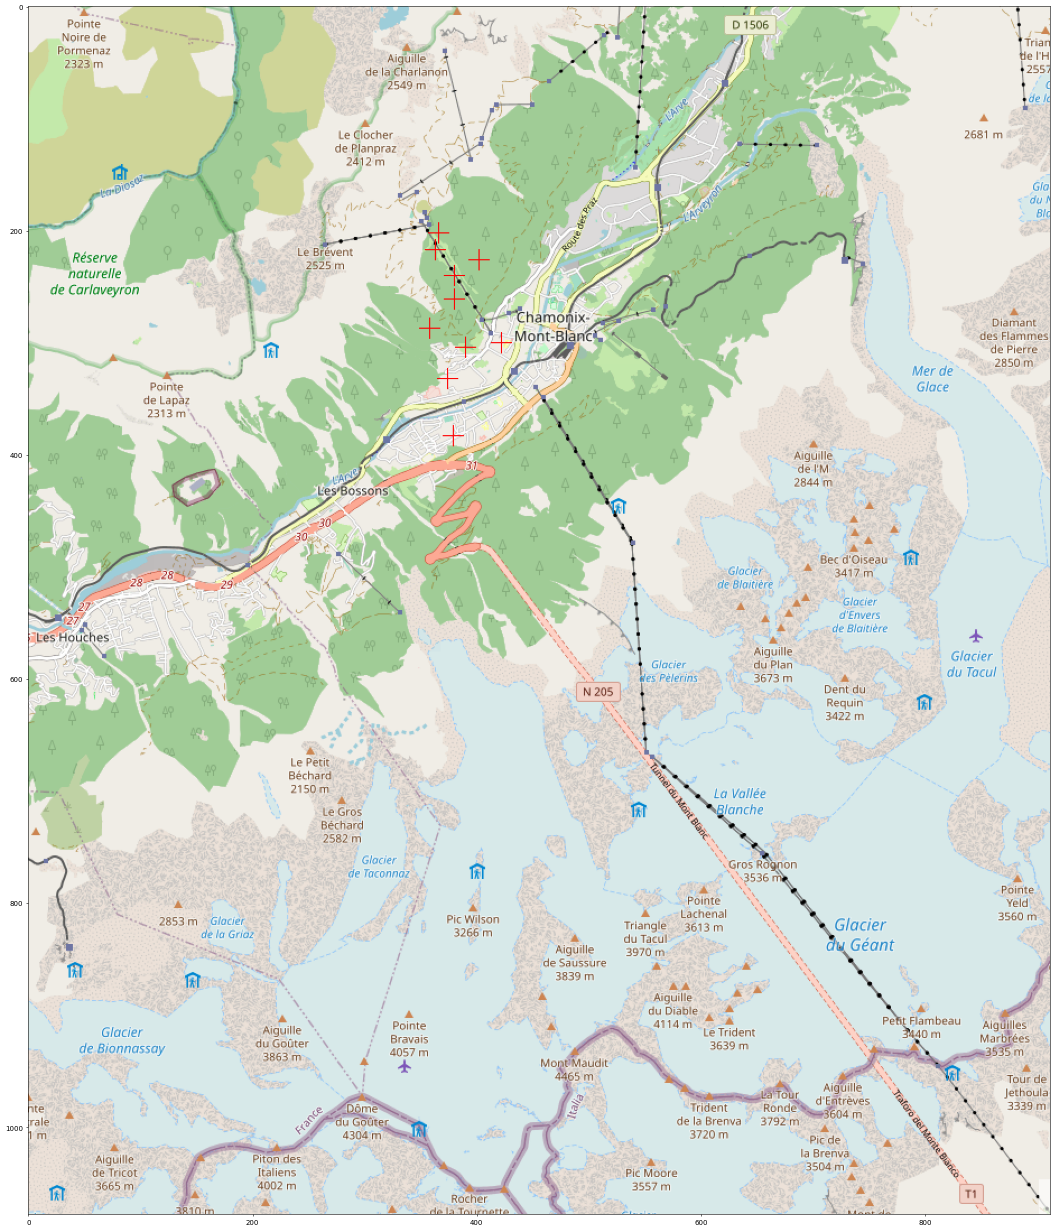

In [15]:
# Amplitude of the  noise
stddev = 5

map = Map(casedir / data['map'], y_origin="bottom")

for i in range(10):
    # slightly moves summits & projections
    summits = [
        (s[0] + randint(-stddev, stddev), s[1] + randint(-stddev, stddev))
        for s in data['xy']
    ]
    projections = [
        p[0] + randint(-stddev, stddev)
        for p in data['projections']
    ]
    photograper, error, path = find_photograper(
        summits=summits,
        projections=projections
    )
    map.draw_point(photograper, color="red")

map.show()